In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Reading the dataset
df = pd.read_csv(r'C:\Users\muatif\Desktop\Projects\StockData Analysis\nse_tata.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


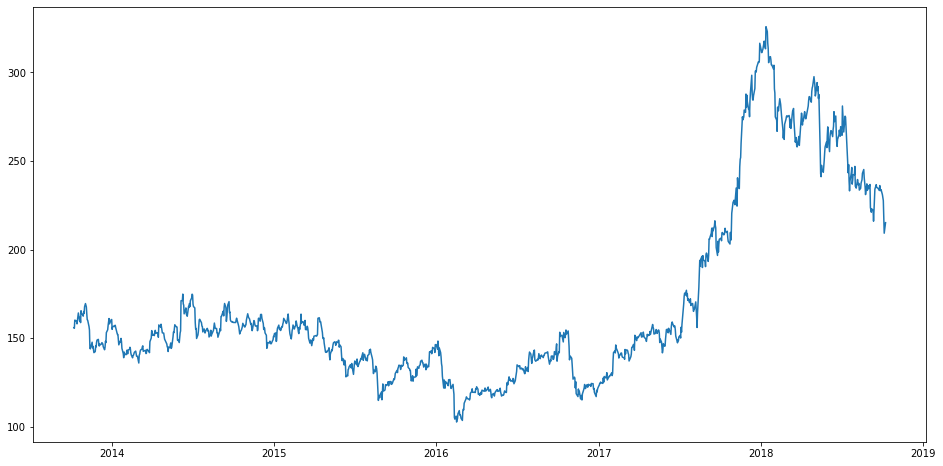

In [4]:
# Analyzing the closing prices from the dataframe
df['Date'] = pd.to_datetime(df.Date, format = "%Y-%m-%d")
df.index = df['Date']

plt.figure(figsize = (16, 8))
plt.plot(df['Close'], label = 'Close Price History')

In [5]:
# Sorting the dataset on date time filter
data = df.sort_index(ascending = True, axis = 0)
new_df = pd.DataFrame(index = range(0, len(df)), columns = ['Date', 'Close'])

for i in range(0, len(data)):
    new_df['Date'][i] = data['Date'][i]
    new_df['Close'][i] = data['Close'][i]

In [6]:
new_df

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45
...,...,...
1230,2018-10-01 00:00:00,230.9
1231,2018-10-03 00:00:00,227.6
1232,2018-10-04 00:00:00,218.2
1233,2018-10-05 00:00:00,209.2


In [7]:
# Normalizing the new dataset
scaler = MinMaxScaler(feature_range = (0, 1))
new_df.index = new_df.Date
new_df.drop('Date', axis = 1, inplace = True)
final_df = new_df.values

scaled_data = scaler.fit_transform(final_df)

train_df = final_df[0:987, :]
valid_df = final_df[987:, :]


In [8]:
train_df

array([[155.8],
       [155.55],
       [160.15],
       [160.05],
       [159.45],
       [158.05],
       [162.0],
       [164.2],
       [159.6],
       [161.85],
       [158.75],
       [165.45],
       [163.85],
       [163.25],
       [162.4],
       [165.0],
       [164.0],
       [167.7],
       [169.5],
       [167.6],
       [163.55],
       [160.35],
       [160.1],
       [156.55],
       [154.55],
       [144.3],
       [143.95],
       [147.7],
       [144.55],
       [145.35],
       [143.65],
       [141.8],
       [142.4],
       [145.5],
       [145.05],
       [147.65],
       [148.9],
       [149.3],
       [146.8],
       [145.55],
       [146.65],
       [146.2],
       [146.7],
       [147.45],
       [147.0],
       [146.75],
       [145.15],
       [143.45],
       [144.75],
       [148.2],
       [147.5],
       [153.1],
       [154.7],
       [157.25],
       [161.05],
       [158.05],
       [159.8],
       [160.45],
       [160.5],
       [154.95],
       [

In [9]:
X_train, Y_train = [], []

for i in range(60, len(train_df)):
    X_train.append(scaled_data[i-60:i, 0])
    Y_train.append(scaled_data[i, 0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [10]:
# Building and training the LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dense(1))

In [11]:
inputs_data = new_df[len(new_df) - len(valid_df)-60:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

In [12]:
lstm_model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [13]:
lstm_model.fit(X_train, Y_train, epochs = 1, batch_size = 1, verbose = 1)

927/927 [==============================] - 34s 32ms/step - loss: 0.0012


In [14]:
# Testing the LSTM model
X_test = []
for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i, 0])
X_test = np.array(X_test)

In [15]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_closing_price = lstm_model.predict(X_test)

predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

In [16]:
# Save the model
lstm_model.save(r'C:\Users\muatif\Desktop\Projects\StockData Analysis\saved_model.h5')

<ipython-input-17-f231db5fe4c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['Predictions'] = predicted_closing_price
No handles with labels found to put in legend.


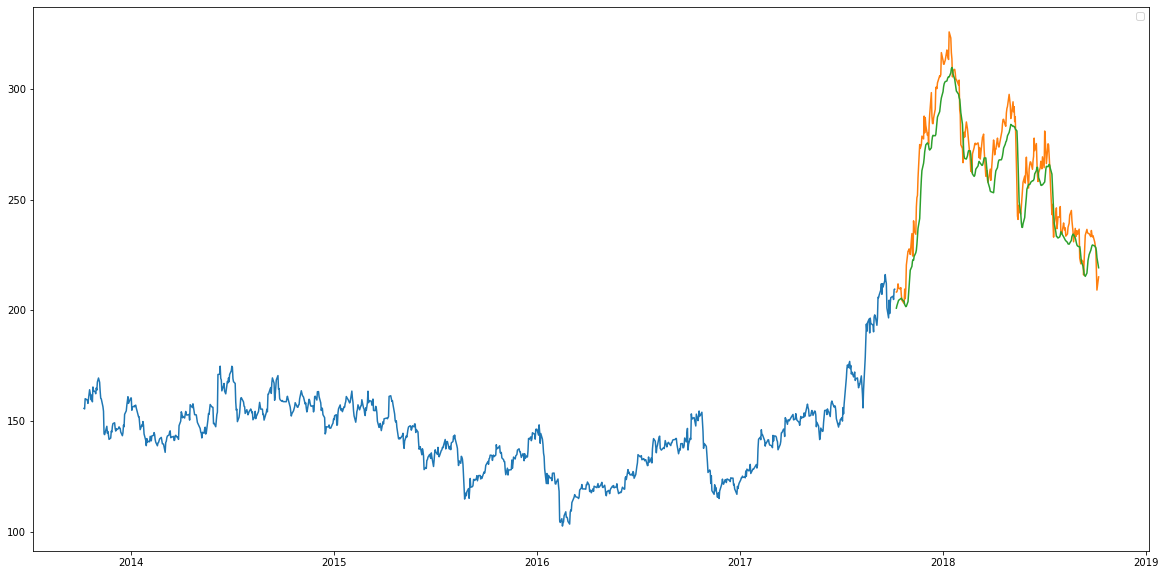

In [17]:
# Visualizing the predicted stock costs with actual price
train_df = new_df[:987]
valid_df = new_df[987:]
valid_df['Predictions'] = predicted_closing_price
plt.plot(train_df['Close'])
plt.plot(valid_df[['Close', 'Predictions']])
plt.legend()